In [66]:
import pandas as pd
red_df=pd.read_csv('winequality-red.csv',sep=";")
red_df.head()
red_df.rename(columns={'total_sulfur-dioxide':'total_sulfur_dioxide'}, inplace=True)

In [67]:
white_df=pd.read_csv('winequality-white.csv',sep=";")
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [68]:
print(len(white_df.index),len(red_df.index),red_df.shape) #number of redwine,whitewine samples and no. of columns


4898 1599 (1599, 12)


In [69]:
print(red_df.columns[red_df.isnull().any()].tolist())#columns which have null values

[]


In [70]:
sum(white_df.duplicated())#no. of duplicate rows in white_wine set

937

In [71]:
r_u=red_df['quality'].nunique()    # no. of unique values in red wine quality
w_u=white_df['quality'].nunique()   # no. of unique values in white wine quality
print(r_u,w_u)

6 7


In [72]:
print(red_df['density'].mean()) # mean density of red_wine

0.996746679174484


# Combining two Datasets:
   As to append two datasets we should first add a new column to two datasets named 'color' specifying color of wine that is __'red'__ or __'white'__ .
   Check the documentation for [Pandas' append](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html) function and see if you can use this to figure out how to combine the dataframes
# Create Color columns:
 Create two arrays as long as the number of rows in the red and white dataframes that repeat the value “red” or “white.” NumPy offers really easy way to do this. Here’s the documentation for [NumPy’s repeat](https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html) function.

In [73]:
import numpy as np
# create color array for red dataframe
color_red = np.repeat('red', red_df.shape[0])

# create color array for white dataframe
color_white = np.repeat('white', white_df.shape[0])

In [74]:
red_df['color'] = color_red
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [75]:
white_df['color'] = color_white
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [76]:
# append dataframes
wine_df = red_df.append(white_df) 

# view dataframe to check for success
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [77]:
wine_df.to_csv('winequality_edited.csv', index=False)

## Visualizing features by graphs:
    we use matplotlib for this

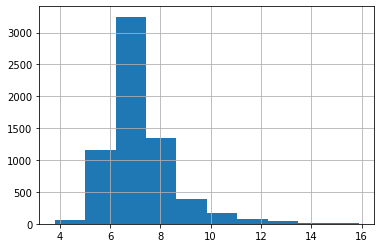

In [78]:
wine_df['fixed acidity'].hist();

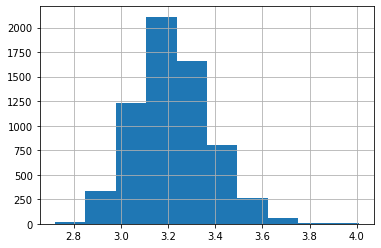

In [79]:
wine_df['pH'].hist()

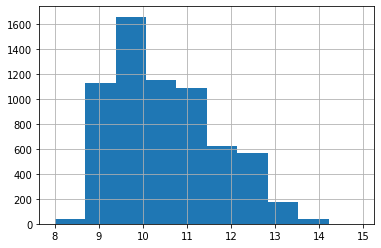

In [80]:
wine_df['alcohol'].hist()

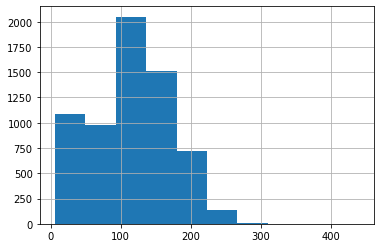

In [81]:
wine_df['total sulfur dioxide'].hist()

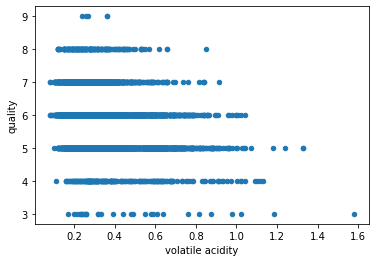

In [82]:
wine_df.plot(x="volatile acidity", y="quality", kind="scatter");

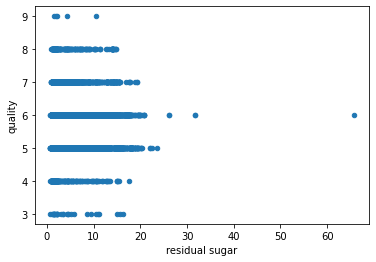

In [83]:
wine_df.plot(x="residual sugar", y="quality", kind="scatter");

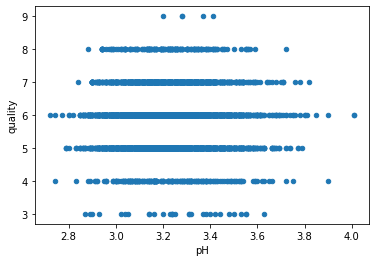

In [84]:
wine_df.plot(x="pH", y="quality", kind="scatter");

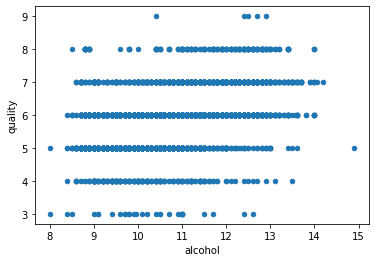

In [85]:
wine_df.plot(x="alcohol", y="quality", kind="scatter");

In [86]:
wine_df.groupby(['color']).mean().quality

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [87]:
wine_df.describe().pH

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [88]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [2.72, 3.11, 3.21, 3.32]

In [89]:
# Labels for the four acidity level groups
bin_names = ['high', 'mod_high', 'medium', 'low']

In [90]:
# Creates acidity_levels column
wine_df['acidity_levels'] = pd.cut(wine_df['pH'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mod_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mod_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [91]:
wine_df.groupby('acidity_levels').mean().quality

acidity_levels
high        5.783343
mod_high    5.784540
medium      5.850832
low         5.859593
Name: quality, dtype: float64

In [92]:
wine_df.to_csv('winequality_edited.csv', index=False)

In [93]:
wine_df['alcohol'].median()


10.3

In [94]:
# select samples with alcohol content less than the median
low_alcohol = wine_df[wine_df['alcohol'] < 10.30]

# select samples with alcohol content greater than or equal to the median
high_alcohol = wine_df[wine_df['alcohol'] >= 10.30]

# ensure these queries included each sample exactly once
num_samples = wine_df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() # should be True

True

In [95]:
print(low_alcohol['quality'].mean(),high_alcohol['quality'].mean())

5.475920679886686 6.146084337349397


In [99]:
wine_df['residual sugar'].median()


3.0

In [101]:
# select samples with residual sugar less than the median
low_sugar =wine_df[wine_df['residual sugar']<3.0]

# select samples with residual sugar greater than or equal to the median
high_sugar =wine_df[wine_df['residual sugar']>=3.0]

# ensure these queries included each sample exactly once
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count() # should be True

True

In [102]:
print(low_sugar['quality'].mean(),high_sugar['quality'].mean())

5.808800743724822 5.82782874617737
